# Identifying Precise Forecasters on r/Wallstreetbets
**BrainStation Data Science Bootcamp - Capstone Project**

**Author: L Gavrilova**

**Date: 6 November 2023**

# Notebook 1 - Labelled dataset - EDA and Cleaning

## 1.0. Introduction

This notebook is an EDA and cleaning on a relatively small dataset of labelled data focused on the intent to buy (or not to buy) securities expessed by various authors on the subreddit of Wallstreetbets in early 2021.  I will refer to this dataset as "labelled dataset" throught the rest of the notebooks. 

* The labelled dataset has been prepared and labelled by researchers from the University of Texas at San Antonio and presented in their paper published in March 2022. 
* The dataset itself can be downloaded from here: (https://zenodo.org/record/5851847) 
* The research paper that accompanied it is available here: https://arxiv.org/abs/2203.08694.

The labelled dataset authors focused their work on the issue of how people expresses an intent to buy stocks and shares on social media, and what convinces people to buy stocks.  Their research interest was not a sentiment as such, but understanding what language constitutes an **intent to buy securities**. The authors developed
an annotated dataset of Reddit communications (comments to original posts) centered on the GameStop phenomenon in 2021. 

This notebook deals with loading the labelled dataset described above and exploring the data within it. 

The second half of the notebook deals with cleaning the labelled data in preparation for machine learning modelling in later notebooks.

## 2.1. Labelled dataset EDA 

### 2.1.1. Data Loading and Basic Checks

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import re
import emoji
import os

# Setting display options
plt.rcParams['figure.figsize'] = (6.0, 4.0)  # setting figure size
pd.set_option('display.float_format', '{:.2f}'.format)  # Set the float display option
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('../data/annotation file 3600 done 1142022.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   link_id    5001 non-null   object
 1   parent_id  5001 non-null   object
 2   User       5001 non-null   object
 3   Text       5001 non-null   object
 4   Intent     5001 non-null   object
 5   Support    5001 non-null   object
dtypes: object(6)
memory usage: 235.4+ KB


In [5]:
df.sample(5)

,link_id,parent_id,User,Text,Intent,Support
1077,t3_l6czyt,t3_l6czyt,ParchedGiraffeTails,Buy GME. Yolo 100%,u,y
3181,t3_l88nzd,t3_l88nzd,#NAME?,"MA DUDES, Call wife’s boyfriend and ask him to came and have her for the weekend. CANT LET ANYTHING DISTRACT US FROM THE MISSION THE GME MISSION 🚀",u,y
2014,t3_likmpp,t1_gngq9fh,S4rc4stic_4pe,GME is a good stock I’m gunna buy more!,y,y
4217,t3_m5jn1y,t3_m5jn1y,Opjunkie,Who believes the only people buying GME are whales and retail?\n\nWho believes HFs are riding the wave?\n\nWho realizes that shorts covered and are pumping the stock?,u,n
4260,t3_lbqugu,t3_lbqugu,fuknob,1628 SHARES 💎🚀\n\nTo all the retards claiming this is over; would \n\n- Robinhood still have restrictions on GME/AMC?\n- would hedgies 🤡 still be attempting to manipulate us as they do?\n- would the daily volume of GME/AMC be where it is?\n- are Janet Yellen and the SEC just meeting to talk about their wife’s boyfriend’s anal beads?\n- MSM putting such emphasis into the run having fizzled out\n\nWE ARE IN THE MIDDLE OF WAR. ALL THESE FUCKERS ARE IN BED WITH EACH OTHER. STAY STRONG YOU RETARDED APES 🦍💎🚀,y,y


In [6]:
df.describe()

,link_id,parent_id,User,Text,Intent,Support
count,5001,5001,5001,5001,5001,5001
unique,1948,3153,4662,4952,6,4
top,t3_ladzdt,t3_ladzdt,AutoModerator,GME,u,y
freq,66,46,14,22,3246,2473


In [8]:
df.isna().sum()/df.shape[0]

link_id     0.00
parent_id   0.00
User        0.00
Text        0.00
Intent      0.00
Support     0.00
dtype: float64

In [9]:
df[ df['Text'].isna() ]

,link_id,parent_id,User,Text,Intent,Support
5001,NaN,NaN,NaN,NaN,NaN,NaN
5002,NaN,NaN,NaN,NaN,NaN,NaN
5003,NaN,NaN,NaN,NaN,NaN,NaN
5004,NaN,NaN,NaN,NaN,NaN,NaN
5005,NaN,NaN,NaN,NaN,NaN,NaN
5006,NaN,NaN,NaN,NaN,NaN,NaN
5007,NaN,NaN,NaN,NaN,NaN,NaN
5008,NaN,NaN,NaN,NaN,NaN,NaN
5009,NaN,NaN,NaN,NaN,NaN,NaN
5010,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Dropping rows that have NaN values
df = df.dropna()

In [10]:
df[ df['Text'].isna() ]

,link_id,parent_id,User,Text,Intent,Support
5001,NaN,NaN,NaN,NaN,NaN,NaN
5002,NaN,NaN,NaN,NaN,NaN,NaN
5003,NaN,NaN,NaN,NaN,NaN,NaN
5004,NaN,NaN,NaN,NaN,NaN,NaN
5005,NaN,NaN,NaN,NaN,NaN,NaN
5006,NaN,NaN,NaN,NaN,NaN,NaN
5007,NaN,NaN,NaN,NaN,NaN,NaN
5008,NaN,NaN,NaN,NaN,NaN,NaN
5009,NaN,NaN,NaN,NaN,NaN,NaN
5010,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.2. Correcting values in the 'Intent' collumn

In [12]:
df['Intent'].value_counts()

Intent
u     3246
y      983
m      370
i      318
n       83
 u       1
Name: count, dtype: int64

In [17]:
# Calculating the percentage of each value in the 'Intent' column
intent_percentages = df['Intent'].value_counts(normalize=True) * 100
intent_percentages

Intent
u   64.93
y   19.66
m    7.40
i    6.36
n    1.66
Name: proportion, dtype: float64

Observation: one lable "u" is mistyped, I need to correct it:

In [14]:
# Replacing ' u' with 'u' in the 'Intent' column
df['Intent'] = df['Intent'].str.replace(' u', 'u', regex=False)
# checking again:
value_counts = df['Intent'].value_counts() 
print(value_counts)

Intent
u    3247
y     983
m     370
i     318
n      83
Name: count, dtype: int64


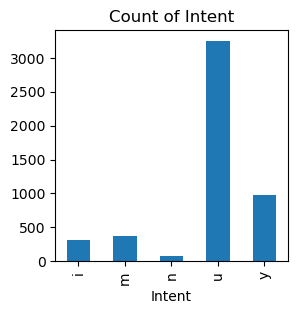

In [ ]:
ax = df['Intent'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Intent',
          figsize=(3, 3))
ax.set_xlabel('Intent')
plt.show()

In [32]:
# Calculating the percentage of each value in the 'Intent' column
intent_percentages = df['Intent'].value_counts(normalize=True) * 100
intent_percentages

Intent
u   64.93
y   19.66
m    7.40
i    6.36
n    1.66
Name: proportion, dtype: float64

In [15]:
df['Support'].value_counts()

Support
y    2473
u    1979
n     292
i     257
Name: count, dtype: int64

In [29]:
# Calculating the percentage of each value in the 'Intent' column
intent_percentages = df['Support'].value_counts(normalize=True) * 100
intent_percentages

Support
y   49.45
u   39.57
n    5.84
i    5.14
Name: proportion, dtype: float64

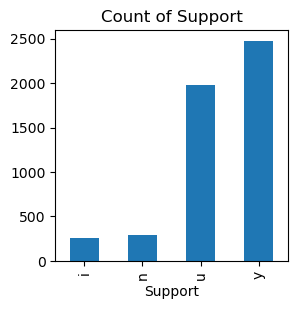

In [31]:
ax = df['Support'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Support',
          figsize=(3, 3))
ax.set_xlabel('Support')
plt.show()

**Observation:**

* There are 5 classes of labels for "Intent" and 4 classes for "Support". 
* Majority of the labels for "Intent" are either unclear (65%), maybe (7%) or informative (6%), together they make up 78% of the dataset. I am not really interested in these uncertain/unclear messages, but they can be analysed as a group to determine what text characteristics make the text "irrelevant", i.e. not expressing ANY view at all with respect to acquisition of securities.  
* Positive intentions (intention to buy a security) are 20% of the dataset, around 1000 records.  They far outnumber negative intent records (only 83 or 1.7%), in 12:1 ratio.  This is an extremely unbalanced dataset, and it does not contain a sufficient number of 'n' rated messages to build reliable predictive ML model.
* This imbalance in the rating is explained by the fact that the dataset was randomly sampled from records collected in the first quarter of 2021, when there was a lot of bullish sentiment expressed during that time by the WallStreetBets participants.  Perhaps, if we focus on a different period od time, there could be more negative messages in that sample. 

* Support" is also imbalanced, with nearly a half of all labels being "yes", another big class of "unclear" and only a small minority expressing lack of support (6%). 

### 2.1.3. EDA of the "Text" column

In [18]:
# Get the counts of each unique value in the 'User' column
user_counts = df['User'].value_counts()

# Print the value counts
print(user_counts)

User
AutoModerator        14
[deleted]            11
MLBBear               7
lucasjhinton          7
LavenderAutist        5
                     ..
kaptainkooleio        1
HolderToTheMoon       1
No_Balance_3566       1
Castranada            1
AcceptableSilver2     1
Name: count, Length: 4662, dtype: int64


In [19]:
# Display the top 10 most frequent users
print(user_counts.head(10))

User
AutoModerator      14
[deleted]          11
MLBBear             7
lucasjhinton        7
LavenderAutist      5
budispro            5
MadmantheDragon     5
Qikqok              5
singh161798         4
Keepitlitt          4
Name: count, dtype: int64


In [20]:
# Get the counts of each unique value in the 'User' column
parentid_counts = df['parent_id'].value_counts()

# Print the value counts
print(parentid_counts)

parent_id
t3_ladzdt     46
t3_lat43j     38
t3_kx3ja5     33
t3_layuxv     32
t3_lb6aiq     29
              ..
t3_l6jj4d      1
t3_law9mf      1
t3_lqttmb      1
t3_mn1hr2      1
t1_gltj1f7     1
Name: count, Length: 3153, dtype: int64


In [22]:
# Creating a new column with word count that will calculate the total number of words in the column "Text"
df['word_count'] = df['Text'].str.split().str.len()

In [23]:
# Having a look at the distribution of word counts in 'Text' column:
df['word_count'].value_counts()

word_count
11     191
10     177
8      168
13     165
9      164
      ... 
195      1
513      1
215      1
194      1
153      1
Name: count, Length: 228, dtype: int64

In [24]:
print(df['word_count'].value_counts().max())

191


Observation:

* Many postings have a very small word count, 9-13 words per message (only one sentence).  Some messages have only one emoji in it, no words. 
* The longest post is 181 words long.  This is not as long as I expected.  This is explained by the fact that the dataset is sampled from comments (replies to original messages), and they tend to be shorter in length (comments, not posts).
* Some posts received much more attention that others (this is a typical phenomenon on social media), possibly skewing the distribution of sentiment, but since the dataset was randomly sampled at what happened to be a bullish period on the markets.

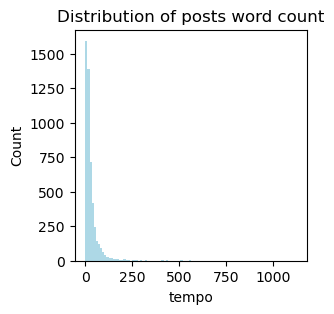

In [25]:
# Plot a histogram of selftext word counts
plt.figure(figsize=(3,3))
df.word_count.hist(bins=100, grid=False, color='lightblue')
plt.title('Distribution of posts word count')
plt.xlabel('tempo')
plt.ylabel('Count')
plt.show()

Observation: 

* The distribution of word count is extremely skewed, with majority (>75%) of posts having a very small number of words. 
* But a very small percentage of authors posted lenger posts that skewed the right tail a lot. 

### 2.1.4. Comparing the "Intent" and "Support" labels

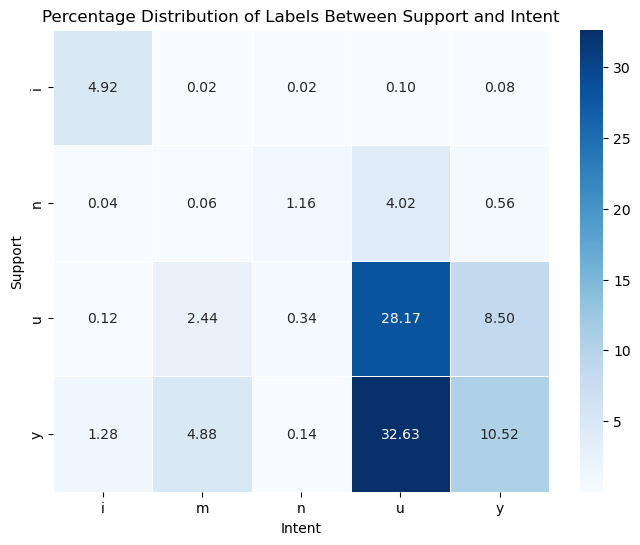

In [38]:
# Counts between 'Support'  and 'Intent' 
matrix = pd.crosstab(df['Support'], df['Intent'])
total_rows = len(df)
percentage_matrix = (matrix / total_rows) * 100

# Plot for the percentage matrix
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)
plt.title('Percentage Distribution of Labels Between Support and Intent')
plt.xlabel('Intent')
plt.ylabel('Support')
plt.show()

**Observation:**

* 33% of comments fall into a category that supports the wallstreetbets setiment in general, but does NOT express an intent to buy certain securities.  
* This is a result of strict guidelines for labelling that was designed by the researchers that published that paper.  
* For example, messages with index numbers [22] or [7] certainly sound bullish to me (see below), expressing pretty clear financial recommendation ("Dont sell', "I am really liking [this stock]"), and I would consider this as a "yes" (a positive recommendation, a financial advice to invest) for the purposes of my investigation to find expressions on financial advice on social media.  However, the researchers that designed labelling guidelines had a different focus, separating a general bullishness from an actual **intent**. This explains the mismatch between my expectations and the actual labels.
* Since I dont have any other labelled dataset that I could use for my analysis, I will still proceed with my machine learning project, keeping in mind this peculiariy of the dataset.

In [44]:
filtered_df1 = df[(df['Intent'] == 'u') & (df['Support'] == 'y')]
filtered_df1.head(5)

,link_id,parent_id,User,Text,Intent,Support,word_count
5,t3_lx47v2,t3_lx47v2,not_chickentarian,GME went up to 131$ in AH and is now breaking 125 sell wall. Tomorrow come fast plsss 🚀🚀,u,y,19
7,t3_l68y04,t3_l68y04,radehart,"Do not sell GME, BUY THE DIP! Big Money will sell off till close trying to scare you out of your position.",u,y,22
15,t3_lfc03e,t3_lfc03e,crage222,All diamond hand GME posts need this level of entertainment from here on out. \n\n\n\- I will do nothing,u,y,19
22,t3_l80upw,t3_l80upw,dg1890,Guys. I’m really liking $GME atm. Good stock,u,y,8
23,t3_lrmrsc,t3_lrmrsc,big_money-ganooo,Is there discord or something for gme apes?,u,y,8


* I also considered using "Support" as my target variable for modelling. However, the labelling guidelines for that column primarily focus on the expressions of anti-establishment sentiment, such as a hatred of hedge funds in general, hatred of the SEC, etc.  
* Let's look for example, at message index [2350] below:  "I'm fucking loading up on GME puts. Definitely agree that the company was undervalued and fuck hedge funds, but after this squeeze is done, I really don't think it's a 10B market cap company." 
* "Loaded on GME puts" = the author believes that the share price of GME will decline a lot. 
* The author expressed a hatred of hedge funds (therefore Support = 'y'), but at the same time the author has no intention to buy GME stock, as it is in his/her opinion is overvalued.  So, the message is correctly labelled, following the guidelines established by the researchers, however, were I to use "Support" as my target variable, I would have this message classified as "positive", whereas the author clearly expresses a negative view on the stock's financial performance. 
* Overall, I concluded that for the purposes of my analysis focused on the financial advice expressions, I will make "Intent" as my target variable.  It is not perfect, but it is better aligned with my goals than the "Support" label.  

In [48]:
filtered_df2 = df[(df['Intent'] == 'n') & (df['Support'] == 'y')]
print(filtered_df2.shape)
filtered_df2.head(5)

(7, 7)


,link_id,parent_id,User,Text,Intent,Support,word_count
1212,t3_l90om0,t3_l90om0,Mintmoondog,"Someone seems afeard for his GME bags...I'm not a bot - I'm not a boomer...but I know this song ""Meet the new boss!...same as the old boss!""\n\nGood luck with GME I'm with you - but I have been a suffering silver bug for years and that is the greatest manipulated short in history. I'll fight that war you fight yours",n,y,61
2350,t3_lsc5ji,t3_lsc5ji,_BearHawk,"I'm fucking loading up on GME puts. Definitely agree that the company was undervalued and fuck hedge funds, but after this squeeze is done I really don't think it's a 10B market cap company.",n,y,34
2394,t3_lat43j,t3_lat43j,blizg,I sold a $75 GME put. I dare them to exercise it. That’s 100 more stocks in my pocket,n,y,19
4320,t3_lanulm,t1_glp73dz,brettwestbrook,"I personally wouldn’t have been the first to buy into GME. I still haven’t this entire time. I’m just pointing out that Wall Street treats our 401k’s like a weekend at the casino and since they’ve got so much money, the rules don’t really matter. When individuals got together and played an Uno reverse card they called foul and wanted everything to stop. You are on the sub of little guys paving their own way. I have no profit incentive posting here. It’s just ironic how the rules don’t apply to everyone in the market.",n,y,95
4578,t3_lnd8jo,t1_go1disd,Beav710,Lol stupid fucking shill trying to get people to panic sell. I don't even have skin in the game just wanted to say fuck you is all.,n,y,27


**Conclusion**:

* I will use the "Intent" as my target variable.  It is extremely unbalanced with 12:1 ratio in the 'yes' and 'no' labels. Moreover, it is extremely small, with only around 1000 rows that really interest me (expressions of financial advice). However, this is the best I have and I will attempt to apply machine learning techniques to see whether the results are satisfactory and to learn from the experience.
* I will use ChatGPT to generate additional negative labels to upsample my dataset with more negative lebals "n".

## 2.2. Cleaning the text before modelling

### 2.2.1. General pre-processing

In the section below I perform various cleaning steps to prepare the dataset for modelling. 

* Various ML techniques require different pre-processing: simple bag of words approach does not consider the sequence of words, or the context, so they require more preparation (lowercasing, stripping away punctuation, lemmatisation or stemming, etc).  

* More advanced NLP techniques, such as sentence embeddings, benefit from retaining the sequence of words in a sentence and some models also were trained on not lowercased text, such as internet text, so they will actually suffer in performance if the text is severely lemmatised and de-punctuated.  

* In this notebook I do minimum required pre-processing, such as removing https, urls, hashtags, etc. 

* Each modelling book will go through additional cleaning steps, as appropriate for a machine learning technique used in that particular notebook.  

In [49]:
df_clean = df.copy() 

In [2]:
meme = 
"garden
climbing
was,
house
from
Fifteen
cottage
dressed.
also
Arthur,
head;
one.
game,”
visual
long
He’d
pleasant
B
heavily,
“First
then
you’re
hat
he
registered
about.
sun
word
mixing
last
rained
liked
built!”
some
door,
remembered
nice
was
well,
wouldn’t
recollection
yellow
“It’s
devices
pronounced
said
d
adjusted,
mean,
seconds
though
up,
thought,
wandered
hung
woke
worried
down
wasn’t
got
window,
please
thought.
room,
sort
know.
advancing
four
They
intervening
Country
too—most
man.
shook
brush—so.
ceiling.
second
opened
Oh
away
lay
“First
say,
suspect
squelched
decided,
it
build
about
forty,
and
faces.
bit,
generations
dried
point
village.
find
itself
'Yellow,'
finger
form
drivers.
juggled
life
properly
washed,
what’s
thirty
flushed
Dent,”
people
West
it’s
warrior;
On
out,
find
Properly
found
rather
drivers.
'Yellow,'
search
nearest
tried
another.
Today
Not
a
slight
stuck
little
set
time
forty,
“you
telling
keen
know
vaguely
yet
build
round
other
D,
get
stood
You
Toothpaste
dear,
mighty
win,
have
do
lane
faces.
months
living
wardrobe
worry
be
wanted
top
means
squelched
being
room,
At
Oh
other
descended
squarish,
visual
just
“I’m
Shaving
garden
said.
Passing
bedroom
because
axes
descendant
years,
decided,
dash
lying
game,”
its
eyes
bypass,
again.
A
point
it.
mirror—pointing
Yawn.
lot
bulldozer,
first.”
kitchen
L.
allow
More
intervening
windows
Dent,”
he’d
first.”
probably
wonder
old,
be.
heavily,
remarkable
under
edge
work
squattish,
in
on.
three
words
tum
were
going
For
means
Why
them
mirror.
a
the
tell
bright
too—most
genes
wash.
knock
Mongoloid
carbon-based
suspect
People
must
eight
important.
moved
bedroom
it
connect
tall,
outside
nearest
put
slippers,
see
hats.
round
seemed
slight
head;
before?
gripping
no
looking
over?
on.
blaze
lane
D
reflected
swig
d
happened
it,”
time
earned
amount
it,
through
For
bypasses.”
special
spend
allow
got
in
fiercely
accept
at
Point
tried
only
long
way
generations
or
dear,
vestiges
him.
stuck
why’s
clearest
drinking
terrible
please
found
day
Properly
broad
course
directly
wash.
bedroom.
bright
size
advancing
between,
person
front
built?”
predilection
though.
properly
stood
D.
On
The
opened
council.
are
moment
there,
leg
shaved
spread
up
years
dried
Coffee
bristles.
there.
Prosser,
bulldozer,
water,
what’s
“you
Bypasses
wrong
D.
Thursday
wanted
he’
glazed
large
been
Khan,
B
shaved
said,
once
hung
good.
it’s
bypass.
its
axes.
L.
said,
shone
tell
blearily
fat
friends
“Come
enough,
window
shaving
whom
more
good.
given
shone
mouth.
why—he
fast.
Something
means—it
himself.
who
had
wife
stared
brush—so.
hotly
up,
lived
him.
grins
“Yellow,”
before
cottage
predilection
so
radio
them
nervous
built
A
seconds
big
happened
know.
though.
“What
made
but
London
Scrub.
E,
irritable.
stand
male-line
glint
irritable.
nervous
rolling
means—it
Khan,
worked
pronounced
C.
his
has
glass
looks
amount
dash
yet
“we’ll
very
about.
man.
shabby
“why’s
stoutness
three
off
didn’t
Not
at
People
going
outside
pipeline
for
stomped
they
himself
fridge,
mixing
Toothpaste
hadn’t
rusts
London
thought,
“this
hell
moment
Mr.
tongue.
swig
any
accept
radio
built?”
You’ve
said
I’ve
direct
that
specifically
ease
devices
rained
often
probably
house
often
you’re
because
window,
wandered
supposed
over?
thirty
telling
it,”
axes
you
for
large
Had
out
fur
fat
less
most
began
Had
him
over.
wish
he
himself
ever
back
fiercely
C,
something
it.
mean,
bipedal
He
caught
pub.
o’clock
since
given
leg
woke
saw
always
In
known
window
feel
itself
looked
vestiges
old,
friends
wasn’t
cleared
finger
looked
back
can’t
he’d
wouldn’t
eye.
Arthur,
grins
Arthur
angry,
pub.
plug,
shabby
roses,
racial
were
Mongoloid
lot
wardrobe
roses,
descendant
day
fast
mind
convenient
clear
heard
clearest
eyes
bypass
put
left
are
His
bypass,
used
him
size
proportion
milk,
glass
Passing
carbon-based
didn’t
no
set
he’
never
over
heard
Curiously
away
windows
Wednesday
mind
Thursday
glint
mirror.
At
hangover
stopped
ease
anywhere
great
one.
brick,
work
suspected:
mighty
water,
built!”
indefinitely.”
fridge,
bypass
have
job,
climbing
all
see
He
wife
that
reflected
rolling
bathroom
over.
adjusted
length,
all
angry
was
adjusted
bulldozer
derisive
new
ape.
“What
out.
Prosser
with.
then
bathroom
person
proportion
one
search
took
had
Country
pub
human.
front
as
In
stomped
worked
new
out.
door,
juggled
hangover
night
muddy,
with
years,
tongue.
where
You’ve
C,
fact
discernible
less
drink
glazed
bristles.
ancestry
sun
up
lived
well,
left
used
Point
points
always
there.
morning
nice
off,
hats.
Arthur
racial
or
dressed.
made
worry
afraid
than
vaguely
interesting
with.
has
thing
length,
big
Shaving
his
washed,
Scrub.
rusts
himself.
afraid
warrior;
many
slippers,
registered
worried
why’s
particularly
words
which
caught
You
More
suspected:
been.
Dent,
sort
before
blearily,
of
job,
Fifteen
they
saw
instead.
four
path.
particular,
which
kitchen
years
spend
council
descended
must
been.
window.
as
fur
directly
another.
angry
on
ask
Ridiculous.
hadn’t
night
pub,
what
discernible
adjusted,
remembered
rise
blaze
in.
genes
ancestry
do
morning
terrible
wrong
about
people’s
seriously
why—he
dark-haired
fact
blearily,
Today
o’clock
failed
stoutness
male-line
water.
would
squattish,
squarish,
more
can’t
points
hell
form
specifically
fast.
muddy,
while
anywhere
Bypasses
be.
than
stand
on
people’s
Dent’s
down
supposed
never
rather
stared
“we’ll
most
gone
village.
looks
though
life
Mr.
again.
council
connect
very
eye.
keen
mud
being
pub,
by
of
Yawn.
bypasses.”
path.
little
win,
remarkable
would
plug,
any
began
knock
just
The
drinking
exactly
some
before?
an
A,
over
know
local
the
mirror—pointing
shaving
I’ve
quite
special
something
particularly
shook
important.
with
off,
characteristics,
human.
say,
pipeline
yellow
way
said.
since
whom
own
gripping
known
bit,
under
once
bulldozer
bedroom.
from
built
farmland.
earned
thought.
“Yellow,”
an
“Come
Genghis
out
but
“I’m
bipedal
been
“this
you
brick,
Kettle,
time.
quite
while
tall,
last
window.
“It’s
cleared
wonder
pleasant
ape.
His
bypass.
nervous,
moved
lying
edge
off
farmland.
convenient
Genghis
instead.
out,
advertising.
“why’s
fast
drink
It
feel
Kettle,
ceiling.
recollection
tum
living
one
gone
what
exactly
many
Dent’s
top
God,
mud
Dent,
looking
indefinitely.”
advertising.
Why
angry,
Prosser,
C.
D
Something
enough,
ask
to
Ridiculous.
rise
failed
hotly
God,
ever
it,
direct
between,
local
blearily
broad
by
where
so
own
time.
make
flushed
seriously
clear
dark-haired
took
West
interesting
lay
Prosser
council.
A,
nervous,
be
wet
great
He’d
Wednesday
who
word
stopped
derisive
second
eight
to
course
was,
lie
water.
spread
E,
through
wet
liked
They
there,
in.
milk,
pub
wish
lie
axes.
thing
D,
It
people
and
characteristics,
Curiously
months
only
mouth.
particular,
also
seemed
later
make
hat
later
get
Cupboard"

SyntaxError: EOL while scanning string literal (2933243682.py, line 1)

In [54]:
# Function to clean text
def purge_content(text):
    text_without_urls = re.sub(r'https?://\S+|www\.\S+', '', text)
    text_without_hashtags = re.sub(r'#\S+', '', text_without_urls)
    text_without_mentions = re.sub(r'@\S+', '', text_without_hashtags)
    text_without_linebreaks = re.sub(r'\n+', '', text_without_mentions)
    clean_text = re.sub(r'\n+', ' ', text_without_linebreaks) # replace all newline characters (\n) with space

    return clean_text

In [55]:
# Using apply() method to clean the text
df_clean['Text'] = df_clean['Text'].apply(purge_content)

Examples below show cases when the text contained only urls:

In [53]:
# sanity check
df_clean[df_clean['Text'] == '']

,link_id,parent_id,User,Text,Intent,Support,word_count
402,t3_l66caa,t1_gkyxvml,EllipticalOrbitMan,,i,i,1
1264,t3_l0mc06,t1_gju8jei,wolfiasty,,i,i,1
2187,t3_l6kqyk,t1_gl17oj6,EconomicallyLiterate,,i,i,1
4157,t3_khq3x2,t1_ggo6fi4,JonBoy82,,i,i,1
4265,t3_lat43j,t1_glq69gz,Free_Joty,,i,i,1


In [57]:
# Drop rows where the 'Text' column is an empty string
df_clean = df_clean[df_clean['Text'] != '']

In [58]:
df_clean.duplicated().sum()

0

In [59]:
# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

In [60]:
# Recording the cleaned dataset as a new csv file to be used in other notebooks:
# Save the DataFrame to a CSV file
df_clean.to_csv('../data/02_labelled_dataset_cleaned.csv', index=False)

### 2.2.2. Filtering out emojis by creating a new column

One of the peculiar features of the WallStreetBets community in 2021 was heavy usage of emojis in their messages. The WSB community has its own lingo, or vocabulary, with meaning of words not quite clear to an outside observer.  In the code below I stripped the emojis from the text and placed them into a separate column, I will consider using them later as a feature for my authors clustering analysis. 

In [61]:
# Function to map emojis to their English language descriptions
def emoji_description(emoji):
    emoji_map = {
        "🚀": " super optimistic, ",
        "🦍": " brotherhood, ",
        "🤞": " hope, ",
        "🌙": " very optimistic, ",
        "🌕": " very optimistic, ",
        "💎🤚🏼": " patient investors, ",
        "💎🖐": " patient investors, ",
        "💎🙌": " patient investors, ",
        "🙌": " patient investors, ",
        "💎": " patient investors, ",
        "🧻🤚🏼": " impatient investors, ",
        "🧻🖐": " impatient investors, ",
        # Add more mappings as needed
    }
    # If the full emoji is in the map, return the description
    if emoji in emoji_map:
        return emoji_map[emoji]
    # If not, split any combined emojis and look up their individual descriptions
    else:
        return ''.join([emoji_map.get(char, '') for char in emoji])  # Default to empty string if not in mapping

def extract_and_replace_emojis(df, text_column_name='Text', emoji_column_name='emoji_text'):
    # Initialize an empty column for extracted emojis if a column name is provided
    if emoji_column_name:
        df[emoji_column_name] = ''

    # Function to extract and replace emojis in a text
    def process_text(text):
        emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001F004]+')

        # Find all emojis in the text using the regex pattern
        emoji_matches = emoji_pattern.findall(text)
        emojis_extracted = ''
        text_with_replaced_emojis = text

        # Iterate over the found emojis
        for emoji_str in emoji_matches:
            # For each emoji in the emoji string
            for emoji_char in emoji_str:
                emoji_desc = emoji_description(emoji_char)  # Get description for individual emoji
                text_with_replaced_emojis = text_with_replaced_emojis.replace(emoji_char, emoji_desc, 1)
                emojis_extracted += emoji_char + ' '  # Add space to separate emojis

        # Return the modified text and the extracted emojis
        return text_with_replaced_emojis, emojis_extracted.strip()

    # Apply the processing function to the specified column and create new columns for text and emojis
    result = df[text_column_name].apply(process_text)
    df[text_column_name] = result.apply(lambda x: x[0])
    
    if emoji_column_name:
        df[emoji_column_name] = result.apply(lambda x: x[1])

    return df

In [62]:
# Applying the function to extract and replace emojis from 'Text' column
df_clean = extract_and_replace_emojis(df_clean, text_column_name='Text', emoji_column_name='emoji_text')

In [63]:
# Checking the new column with emojis extracted from the text
df_clean.sample().T
df_clean['emoji_text'].value_counts()

emoji_text
                                                                     4254
🚀 🚀 🚀                                                                  66
🚀                                                                      50
🚀 🚀                                                                    28
🚀 🚀 🚀 🚀                                                                26
                                                                     ... 
🧻 🤚 🏼 🧻 🤚 🏼 🧻 🤚 🏼 🧻 🤚 🏼 💎 🤚 🏼 💎 🤚 🏼 💎 🤚 🏼 💎 🤚 🏼 💎 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀       1
💎 🚀 🚀 🌙                                                                 1
🚀 💪 🏋 💎                                                                 1
📝 👋 💎 👏 🚀 🚀 🚀 🌈 🐻 📉 🚀 🚀 🚀 🌕 🔥 🔥                                         1
🚀 🚀 🚀 🖐 💎 🖐 💵 🖐 🍿 🍗 🚀 🦍 🌚 🚀 🚀                                           1
Name: count, Length: 383, dtype: int64

In [64]:
df_clean.sample(3)

,link_id,parent_id,User,Text,Intent,Support,word_count,emoji_text
4573,t3_kxm0rx,t3_kxm0rx,Overall-Strike-4770,Isit too late for option play on gme? Say 50/55c apr,u,u,11,
3481,t3_lw9vmu,t3_lw9vmu,Competitive-Deal-949,This is great.Now.Throw some of this back into GME.Please.I’m begging you.,m,y,15,
3016,t3_l78za1,t3_l78za1,onehandedbackhand,Finally caved and bought 3 GME shares at 250 today. Worth it for the entertainment value alone.,y,u,17,


### 2.2.3. Replacing WSB slang with custom made "WSB Dictionary"


I also "translated" the emojis and slang used inside the WSB community into proper English language, using a dictionary I developed for these purposes (imported from a CSV file).  I will use such modified text for the sentiment analysis exercise in subsequent stage of this project. 

In [65]:
# Load the WSB lingo dictionary
wsb_dict_df = pd.read_csv('../data/WSB_dictionary.csv')

# Convert the DataFrame to a dictionary
wsb_dict = dict(zip(wsb_dict_df['WSB lingo'], wsb_dict_df['English']))

# Function to replace WSB lingo with English
def replace_wsb_lingo(text):
    # Use a regex pattern to match only whole words
    pattern = r'\b(' + '|'.join(re.escape(key) for key in wsb_dict.keys()) + r')\b'
    # Replace occurrences of each lingo with the English equivalent
    return re.sub(pattern, lambda x: wsb_dict[x.group()], text)

# Apply the function to the 'Text' column
df_clean['Text'] = df_clean['Text'].apply(replace_wsb_lingo)

### 2.2.4 Examples of texts before and after the cleaning steps

In [66]:
original_with_index = df.loc[2026]
print(original_with_index)

clean_with_index = df_clean.loc[2026]
print(clean_with_index)

link_id                                                                                                                                                                                                                                                                                                                                              t3_l6cb1x
parent_id                                                                                                                                                                                                                                                                                                                                            t3_l6cb1x
User                                                                                                                                                                                                                                                                                                      

In [67]:
original_with_index = df.loc[3986]
print(original_with_index)

clean_with_index = df_clean.loc[3986]
print(clean_with_index)

link_id                                             t3_l8ynt4
parent_id                                           t3_l8ynt4
User                                        wowexcellentstuff
Text          did NOT read. $GME to mf Andromeda 🚀🚀🚀🌌🌌\n\n💎🤲💎
Intent                                                      u
Support                                                     y
word_count                                                  9
Name: 3986, dtype: object
link_id                                                                                                                                  t3_l8ynt4
parent_id                                                                                                                                t3_l8ynt4
User                                                                                                                             wowexcellentstuff
Text          did NOT read. $GME to mf Andromeda  super optimistic,  super optimistic,  super optim

In [68]:
original_with_index = df.loc[3386]
print(original_with_index)

clean_with_index = df_clean.loc[3386]
print(clean_with_index)

link_id                                     t3_kkwy50
parent_id                                   t3_kkwy50
User                                 SnooMacarons1548
Text          GME🚀🚀🚀\n\nIt's a money printing company
Intent                                              u
Support                                             y
word_count                                          6
Name: 3386, dtype: object
link_id                                                                                       t3_kkwy50
parent_id                                                                                     t3_kkwy50
User                                                                                   SnooMacarons1548
Text          GME super optimistic,  super optimistic,  super optimistic, It's a money printing company
Intent                                                                                                u
Support                                                                     

### 2.2.5. Saving the dataset without emojis into a CSV file

In [69]:
# Recording the cleaned dataset as a new csv file to be used in further steps:
# Save the DataFrame to a CSV file
df_clean.to_csv('../data/02_labelled_dataset_wo_emoji.csv', index=False)

## 2.3. Conclusion

* I will use the "Intent" collumn as my target variable. It is not perfect, as it was labelled for slighly different academic purposes, but I will this is the best I have and it still can be useful for my analysis and practing various NLP techniques.
* The dataset is extremely imbalanced in my target column "Intent" with 12:1 imbalance between "y" and "n" labels.  This is a serious challenge, and I will attempt to overcome it by using openAI APIs to generate additional negative labels to upsample my dataset. 
* The labelled dataset has been cleaned, with two versions saved as CSV files for further modelling:
    * the first version contains all the emojis
    * the second version had a) emojis replaced with English words that best convey its sentiment and b) WSB specific sland words replaced with normal English equivalents. 
